## Esercizio Classificazione 3



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/disaster.jpg" width="1200">

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/twitter_train.csv'

In [7]:
df = pd.read_csv(path)
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
df.text.isnull().sum()

0

In [18]:
patterns = {
            r"b'": '',
            r'\d+': '',      # rimuove digits (numeri)
            r'[^\w\s]': '',  # Remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',#remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '      # rimuove tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
        df[column] = df[column].str.strip()
    return df

In [19]:
cleaned_df = clean_column(df, 'text', patterns)

In [17]:
cleaned_df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason this earthquake may a...,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,all residents asked shelter place are being no...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska smok...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out control wild f...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,police investigating after ebike collided with...,1


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_features=2000, min_df=0.01, max_df=0.9)
tfidfconverter = TfidfTransformer()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.target, 
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [23]:
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train = tfidfconverter.fit_transform(X_train_vect).toarray()           # applico la trasformazione TF-IDF
print(X_train.shape, y_train.shape)

(5709, 114) (5709,)


In [24]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test = tfidfconverter.transform(X_test_vect).toarray()
print(X_test.shape, y_test.shape)

(1904, 114) (1904,)


In [25]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
test_data_accuracy = accuracy_score(y_test,y_pred)

print(f'Accuracy score of the test data : {test_data_accuracy}\n')
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy score of the test data : 0.7027310924369747

              precision    recall  f1-score   support

           0       0.69      0.88      0.77      1089
           1       0.74      0.47      0.58       815

    accuracy                           0.70      1904
   macro avg       0.71      0.67      0.67      1904
weighted avg       0.71      0.70      0.69      1904

0.6732402839026426


Text(95.72222222222221, 0.5, 'Actual')

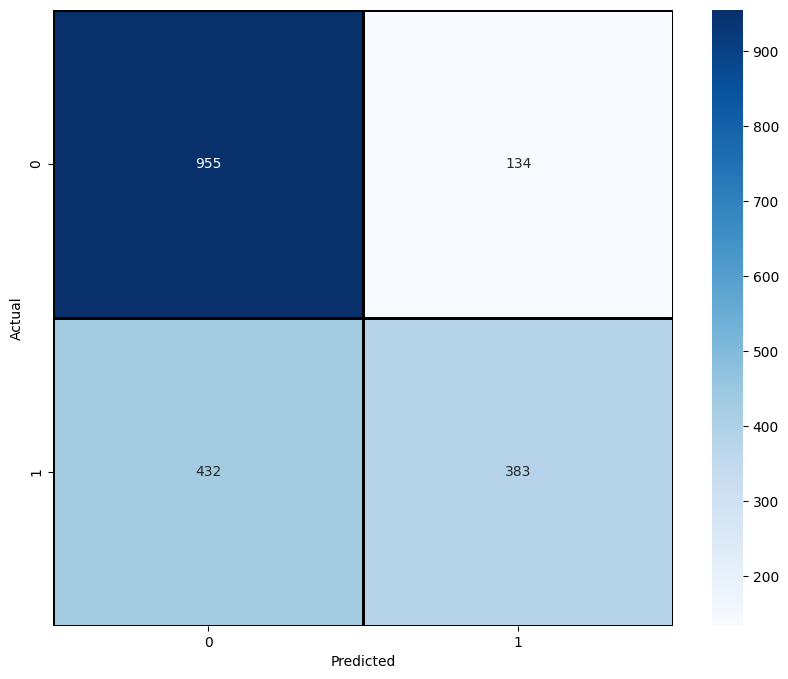

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [28]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy score of the test data : {test_data_accuracy}\n')
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

Accuracy score of the test data : 0.7048319327731093

              precision    recall  f1-score   support

           0       0.68      0.93      0.78      1089
           1       0.81      0.41      0.54       815

    accuracy                           0.70      1904
   macro avg       0.74      0.67      0.66      1904
weighted avg       0.73      0.70      0.68      1904

0.6622579097543115


In [29]:
classifier

SGDClassifier(alpha=0.001, loss='log', max_iter=5, random_state=667, tol=None)

In [30]:
import joblib

joblib.dump(classifier, "SGD_sentiment.pkl")

['SGD_sentiment.pkl']